<div width=50% style="display: block; margin: auto">
    <img src="figures/ucl-logo.svg" width=100%>
</div>

### [UCL-ELEC0136 Data Acquisition and Processing Systems 2024]()
University College London
# Lab 3: Data Processing #1


In this lab, we will use the _open-meteo_ API (https://open-meteo.com/), to acquire historical weather data for London from the past 2 years, inspect it, and prepare it for modelling.

### Objectives
* Learn to deal with **time series**
* Learn to **plot** and represent data
* **Normalise** your data
* Detect and handle **outliers** in time series

### Constraints
* You cannot use pre-existing functions to normalise your data or calculate statistics about it.
* This includes functions from `scipy`, `pandas` and other statistics library.
* This doesn't mean you cannot use `pandas`, but that you cannot use its stats functions (e.g., functions to calculate percentile)
* You must you `numpy` only to manipulate your data
* All data must be acquired through Python: you cannot download the data by browsing to the website and using the mouse 

<hr width=70% style="float: left">

### TASKS

<div class="alert alert-block alert-danger">
<h4>👩‍💻👨‍💻 TASK 1: Acquiring data</h4>

* Create a function `acquire_data(latitude, longitude, start_date, end_date, features)` that acquires **daily** data for **London** between the **1st January 1950** and the **31st December 1954** (included)
* We are interested in the following **features**:
  * Mean Temperature (2 m)
  * Minimum Temperature (2 m)
  * Maximum Temperature (2 m)
  * Precipitation Sum
</div>

<div class="alert alert-heading alert-danger" style="background-color: white; border: 2px solid; border-radius: 5px; color: #000; border-color:#AAA; padding: 10px">
    <b>💎 Tip</b>

* Use a WEB request to acquire the data (like for lab 1), the API endpoint is https://archive-api.open-meteo.com/v1/archive
* Take a look at the open-meteo docs https://open-meteo.com/en/docs/historical-weather-api to see which parameters to use
* Always specify a timezone (you can use `timezone=GMT`)

</div>


In [54]:
from typing import List
import requests

# create a function
def acquire_data(latitude: float, longitude: float, start_date: str, end_date: str, features: List[str]) -> dict:
    """
    Acquires data from the Open-meteo API for a given location and time period.
    The API endpoint is https://archive-api.open-meteo.com/v1/archive.

    Args:
        latitude (float): latitude of the location
        longitude (float): longitude of the location
        start_date (str): start date of the data in the format YYYY-MM-DD
        end_date (str): end date of the data in the format YYYY-MM-DD
        features (List[str]): list of features to be extracted from the API
    Returns:
        (dict): dictionary of data
    """


    
    # add your code here
    url = "https://archive-api.open-meteo.com/v1/archive"

    features = ",".join(features) 
    params = {
        "latitude": latitude,
        "longitude": longitude,
        "start_date": start_date,
        "end_date": end_date,
        "daily": features,
        "timezone": "GMT"
    }
    response = requests.get(url, params = params)
    response.raise_for_status()
    weather = response.json()
    return weather

<div class="alert alert-block alert-danger">
<h4>👩‍💻👨‍💻 TASK 2: Handling data</h4>

* Run the function above to acquire the data
* Create a pandas dataframe from the acquired data
</div>

In [55]:
# add your code here
import pandas as pd

london_latitude = 51.5072
london_longitude = 0.1276
start_date = "1950-01-01"
end_date = "1954-12-31"
features = ["temperature_2m_mean","temperature_2m_min","temperature_2m_max","rain_sum",]
data = acquire_data(london_latitude,london_longitude,start_date,end_date,features)
time_series = data.pop("daily")
time_series = pd.DataFrame(time_series)
meta_data = pd.DataFrame(data)
meta_data.head()

,latitude,longitude,generationtime_ms,utc_offset_seconds,timezone,timezone_abbreviation,elevation,daily_units
rain_sum,51.5,0.100006,2.676964,0,GMT,GMT,3.0,mm
temperature_2m_max,51.5,0.100006,2.676964,0,GMT,GMT,3.0,°C
temperature_2m_mean,51.5,0.100006,2.676964,0,GMT,GMT,3.0,°C
temperature_2m_min,51.5,0.100006,2.676964,0,GMT,GMT,3.0,°C
time,51.5,0.100006,2.676964,0,GMT,GMT,3.0,iso8601


<div class="alert alert-block alert-danger">
<h4>👩‍💻👨‍💻 TASK 3: Plot your data</h4>

* Create a function `lineplot(x, y, title, x_label, y_label)` that creates a lineplot for the feature named `feature_name` and returns both the `Figure` and the `Axis` objects
* The function must return both the matplotlib `figure` object and the `axis` object
* Use the function to create two images containing plots of both the temperature and precipitations and save them to disk
</div>

<div class="alert alert-heading alert-danger" style="background-color: white; border: 2px solid; border-radius: 5px; color: #000; border-color:#AAA; padding: 10px">
    <b>💎 Tip</b>

* Use `matplotlib` to create the plots
* Use the appropriate type of plot for the data that you want to visualise
* For example, you can use a lineplot to plot the average temperature
* Or, you can use a candlestick plot a shaded areaplot to plot min, max, and average temperature in the same figure

</div>


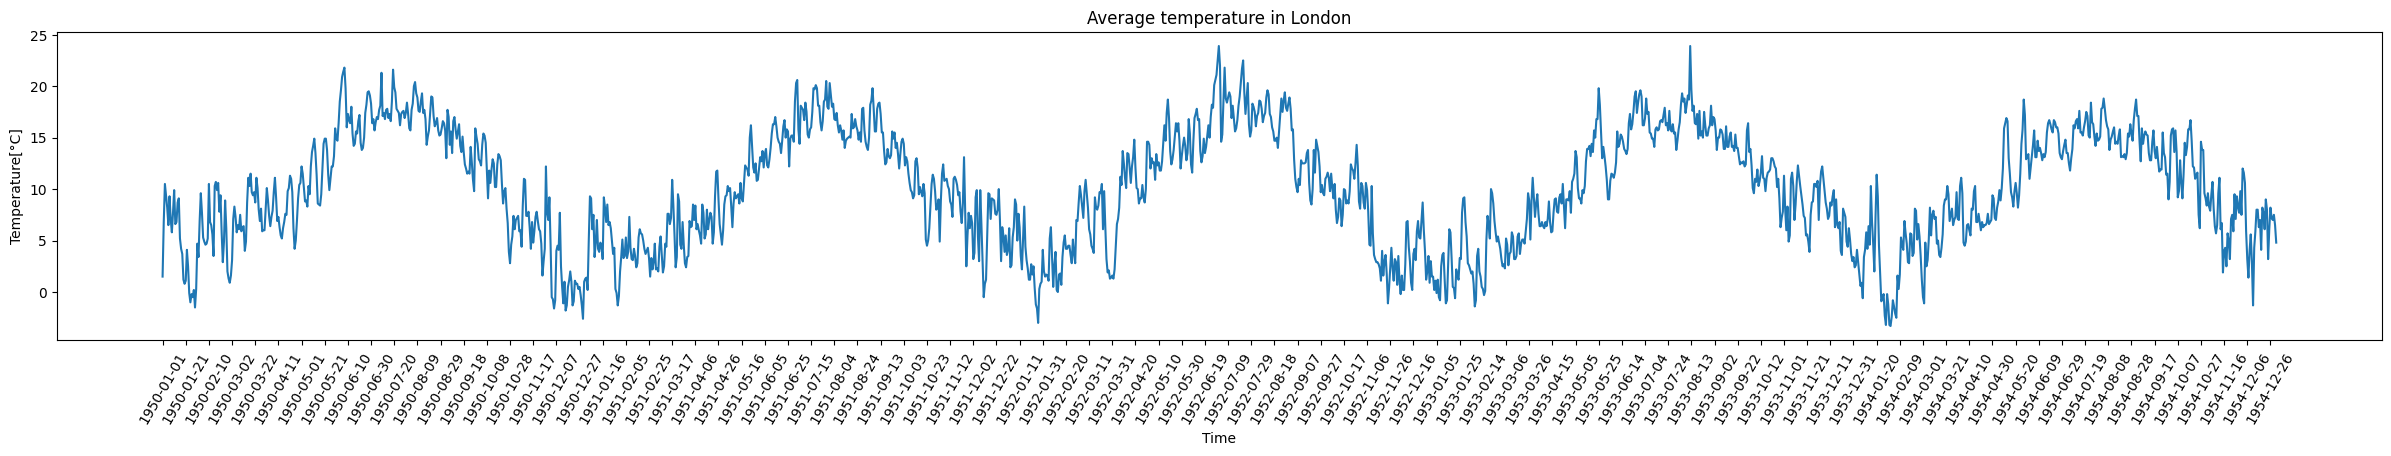

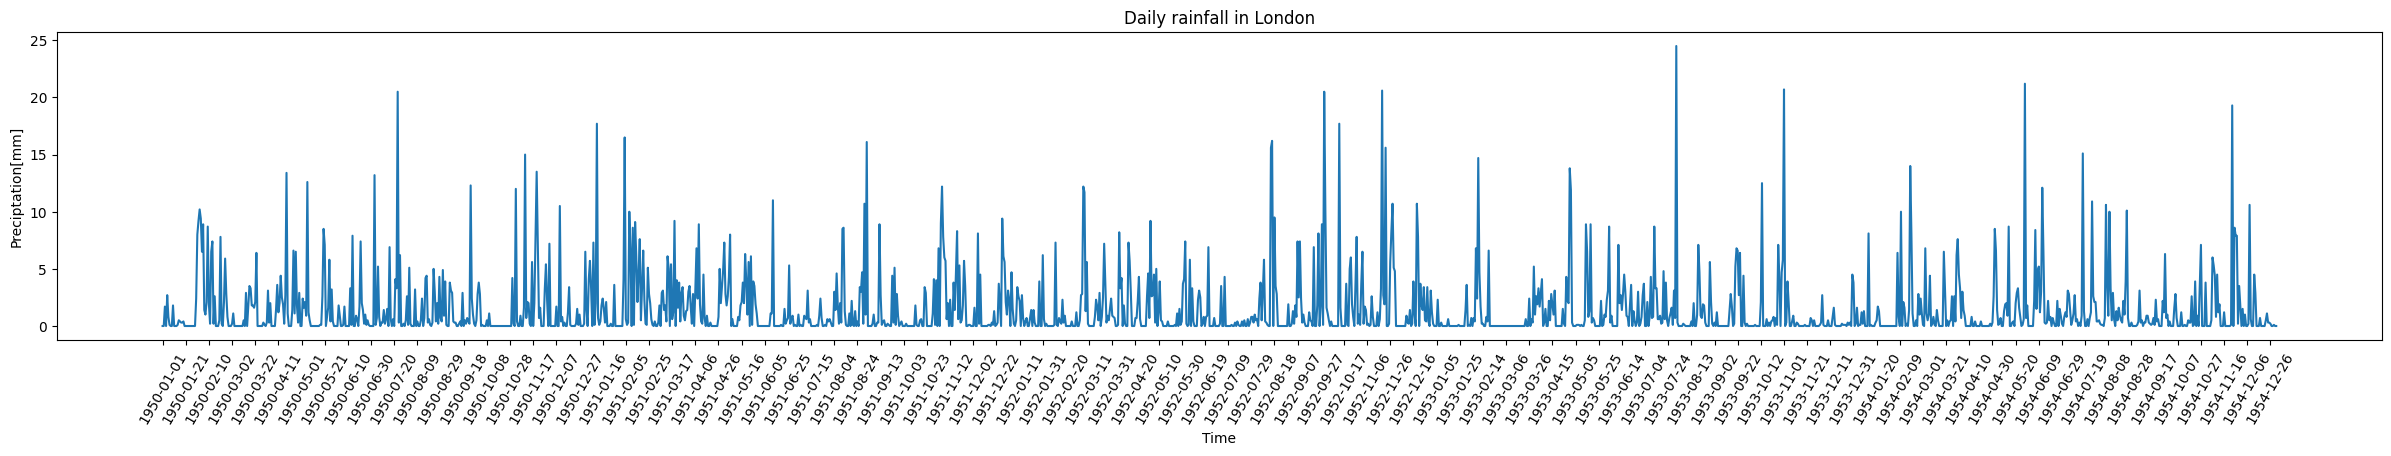

In [56]:
from numpy.typing import ArrayLike
import matplotlib.pyplot as plt


def lineplot(x: ArrayLike, y: ArrayLike, title: str, x_label: str, y_label: str) -> (plt.Figure, plt.Axes):
    """
    Creates a line plot for the given data, title and labels.

    Args:
        x (ArrayLike): value of the data on the x-axis
        y (ArrayLike): value of the data on the y-axis
        title (str): title of the plot
        x_label (str): x-axis label
        y_label (str): y-axis label
    Returns:
        (plt.Figure, plt.Axes): matplotlib figure and axes objects
    """
    # add your code here
    fig,ax = plt.subplots(1,figsize=(30,4))

    ax.plot(x,y)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_xticks(x[::20],x[::20],rotation=60)
    return fig, ax

x = time_series['time']
y = time_series['temperature_2m_mean']
fig, ax = lineplot(x,y,"Average temperature in London", "Time", "Temperature[°C]")
plt.show()

x = time_series['time']
y = time_series['rain_sum']
fig,ax = lineplot(x,y,"Daily rainfall in London","Time","Preciptation[mm]")
plt.show()

<div class="alert alert-block alert-warning">
<h4>👩‍💻👨‍💻 [Optional] TASK 3.1: multivariate plots</h4>

* Create a function `lineplots(x, ys, title, x_label, y_label, legend)` that plot the two variables on the same graph and returns both the `Figure` and the `Axis` objects
* Add a legend
</div>

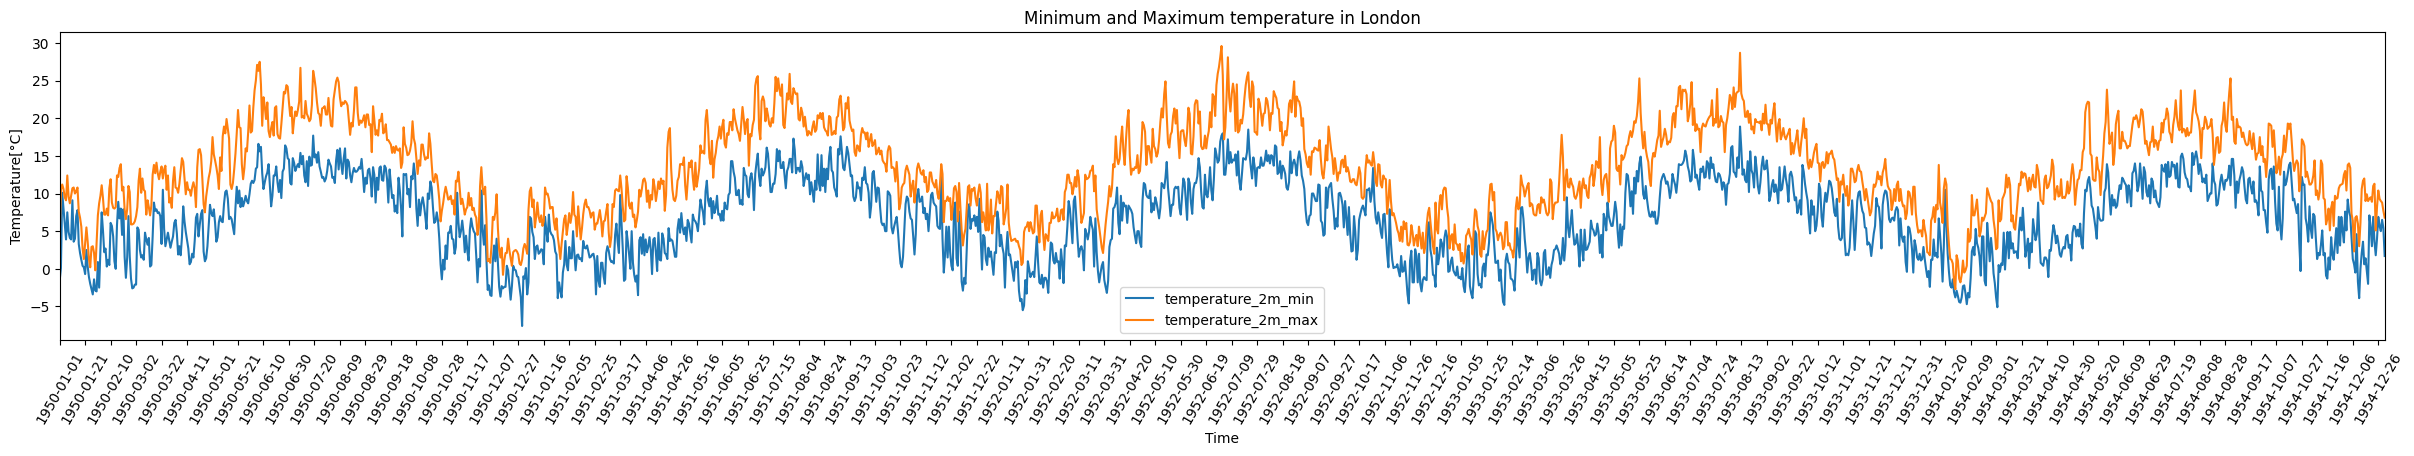

In [57]:
def lineplots(x: ArrayLike, ys: List[ArrayLike], title: str, x_label: str, y_label: str, legend: List[str]) -> (plt.Figure, plt.Axes):
    """
    Creates a line plot for each list of data in the given list of data, title and labels.

    Args:
        x (ArrayLike): value of the data on the x-axis
        ys (List[ArrayLike]): list of values of the data on the y-axis
        title (str): title of the plot
        x_label (str): x-axis label
        y_label (str): y-axis label
        legend (List[str]): list of legend labels
    Returns:
        (plt.Figure, plt.Axes): matplotlib figure and axes objects
    """
    # add your code here
    fig,ax = plt.subplots(1,figsize=(30,4))
    for i in range (len(ys)):
        ax.plot(x,ys[i])
    ax.margins(x=0)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.legend(legend)
    ax.set_xticks(x[::20],x[::20],rotation=60)
    return fig, ax

x = time_series['time']
ys = [time_series['temperature_2m_min'], time_series['temperature_2m_max']]
legend = ['temperature_2m_min','temperature_2m_max']
fig, ax = lineplots(x,ys,"Minimum and Maximum temperature in London", "Time", "Temperature[°C]",legend)
plt.show()

<div class="alert alert-block alert-warning">
<h4>👩‍💻👨‍💻 [Optional] TASK 3.2: Plot with additional statistics</h4>

* Create a shaded area plot, where the mean temperature is the central line, and the minimum, and the maximum are the lower and upper bounds of the shaded area.
* The function should return both the `Figure` and the `Axis` objects
* The shaded area must be 0.3 opacity
* See https://swdevnotes.com/python/2020/display-line-chart-range/ for an example output
</div>

<div class="alert alert-heading alert-danger" style="background-color: white; border: 2px solid; border-radius: 5px; color: #000; border-color:#AAA; padding: 10px">
    <b>💎 Tip</b>

* You can modify existing plots by reusing the `axis`
* For example, running `ax.plot` on an axis that already contains another plot, adds a plot on top of it

</div>


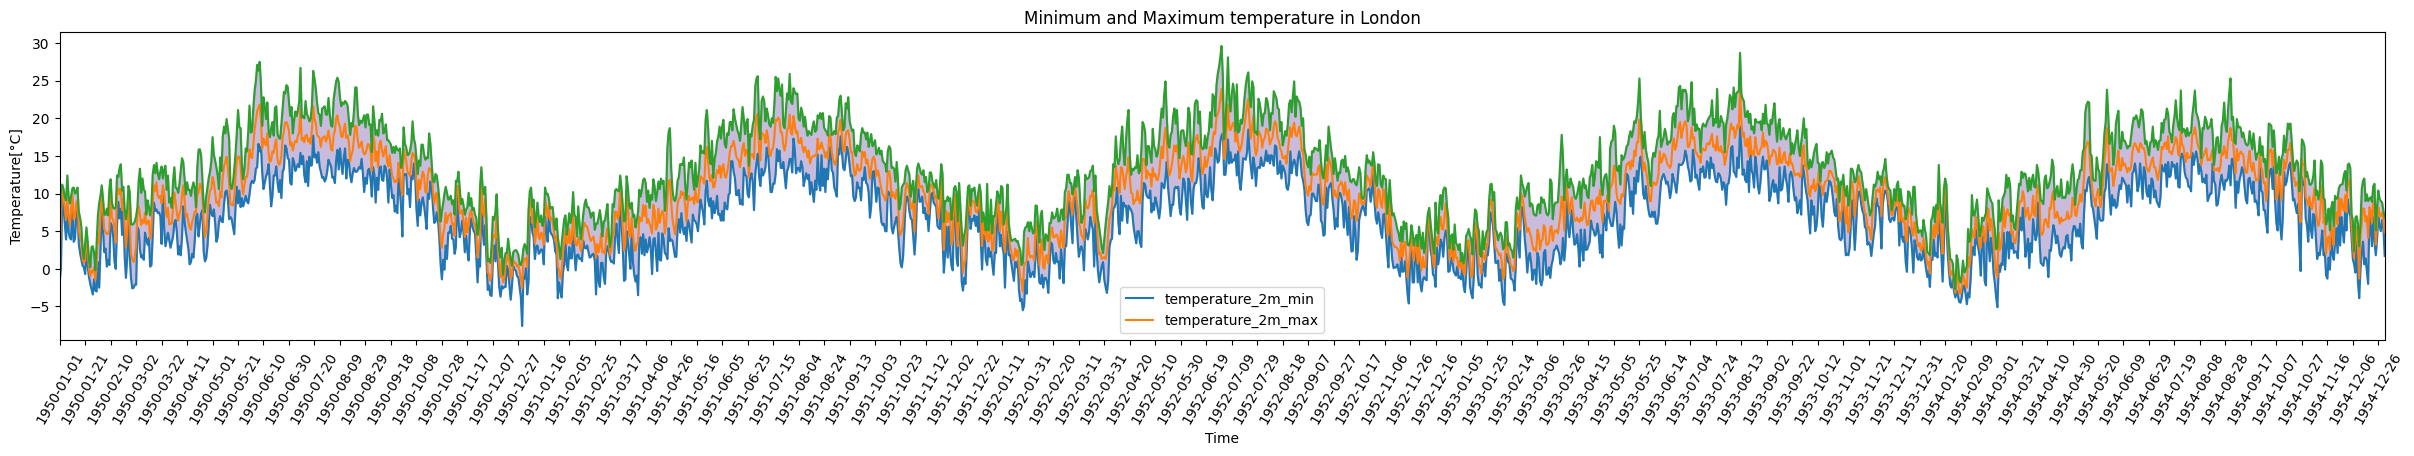

In [58]:
# add your code here
def lineplots(x: ArrayLike, ys: List[ArrayLike], title: str, x_label: str, y_label: str, legend: List[str]) -> (plt.Figure, plt.Axes):
    """
    Creates a line plot for each list of data in the given list of data, title and labels.

    Args:
        x (ArrayLike): value of the data on the x-axis
        ys (List[ArrayLike]): list of values of the data on the y-axis
        title (str): title of the plot
        x_label (str): x-axis label
        y_label (str): y-axis label
        legend (List[str]): list of legend labels
    Returns:
        (plt.Figure, plt.Axes): matplotlib figure and axes objects
    """
    # add your code here



    fig,ax = plt.subplots(1,figsize=(30,4))
    for i in range (len(ys)):
        ax.plot(x,ys[i])

        
    ax.margins(x=0)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.legend(legend)
    ax.set_xticks(x[::20],x[::20],rotation=60)
    return fig, ax


clr = plt.cm.Purples(0.9)
x = time_series['time']
ys = [time_series['temperature_2m_min'], time_series['temperature_2m_mean'],time_series['temperature_2m_max']]
legend = ['temperature_2m_min','temperature_2m_max']
fig, ax = lineplots(x,ys,"Minimum and Maximum temperature in London", "Time", "Temperature[°C]",legend)
ax.fill_between(x, time_series['temperature_2m_min'], time_series['temperature_2m_max'], alpha=0.3, edgecolor=clr, facecolor=clr)
plt.show()

<div class="alert alert-block alert-danger">
<h4>👩‍💻👨‍💻 TASK 4: Normalising your data</h4>

* Create a function `minmax_norm(x)` that takes the acquired data, normalises the data using Min-Max normalisation only using `numpy`
* The function should returns an array containing the normalised data
* Normalise the `temperature_2m_mean` feature
* Plot the normalised data over the non-normalised one in the same plot
</div>

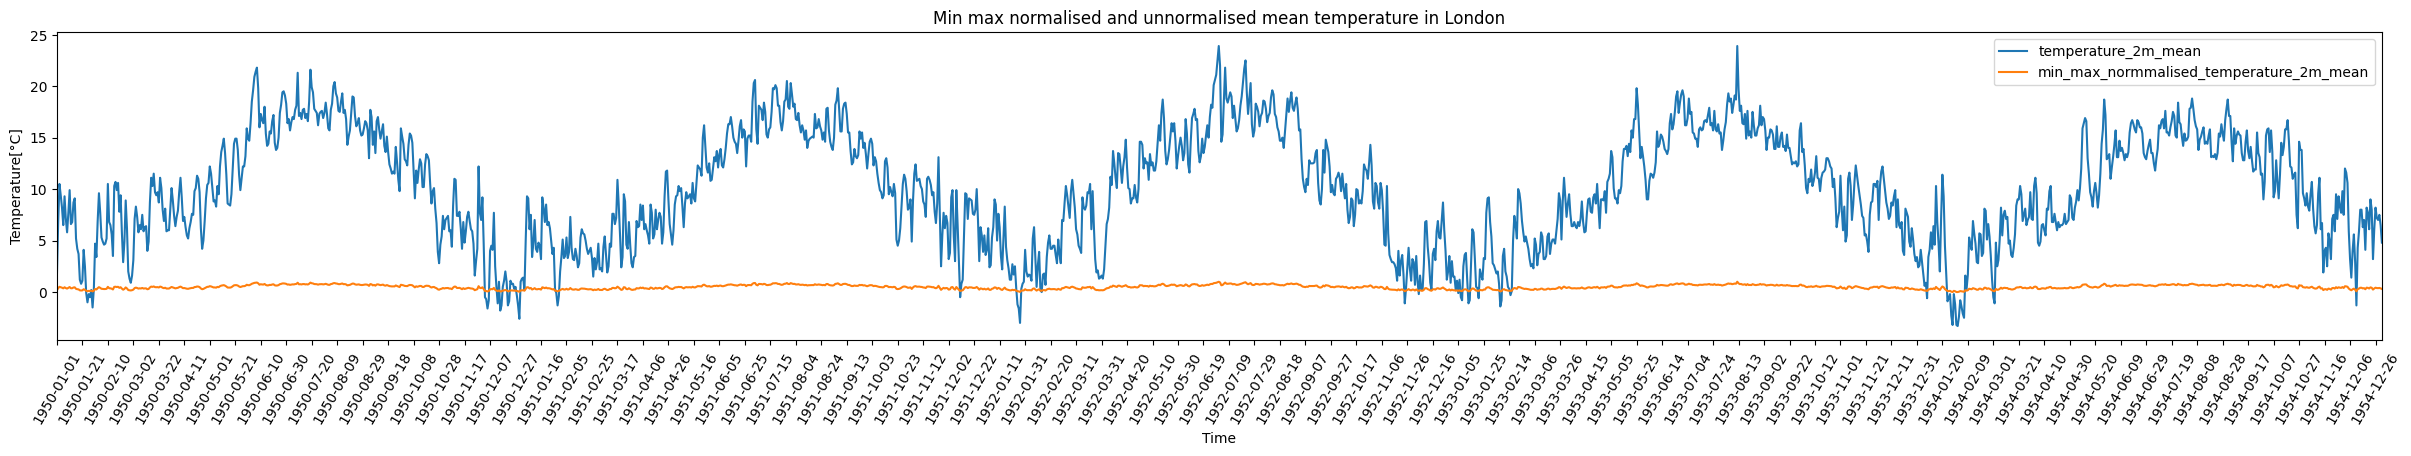

In [65]:
import numpy as np


def minmax_norm(x: ArrayLike) -> ArrayLike:
    """
    Normalises the data between 0 and 1 using the min-max normalization.

    Args:
        x (ArrayLike): data to be normalized
    Returns:
        (ArrayLike): normalized data
    """
    
    # add your code here

 
    
    min_value = np.min(x)
    max_value = np.max(x)
    normed_value = (x-min_value)/(max_value - min_value)
    return normed_value






temp_mean = time_series['temperature_2m_mean']
mmnormed_temp = minmax_norm(temp_mean)

x = time_series['time']
ys_1 = [temp_mean, mmnormed_temp]

legend = ['temperature_2m_mean','min_max_normmalised_temperature_2m_mean']
fig, ax = lineplots(x,ys_1,"Min max normalised and unnormalised mean temperature in London", "Time", "Temperature[°C]",legend)
plt.show()






    

<div class="alert alert-block alert-warning">
<h4>👩‍💻👨‍💻 [Optional] TASK 4.1: Z-score normalisation</h4>

* Create a function `zscore_norm(x)` that takes a pandas series and normalises it using the z-score.
* The function should returns an array containing the normalised data
* Normalise the `temperature_2m_mean` feature
* Plot the normalised data over the non-normalised one in the same plot
</div>

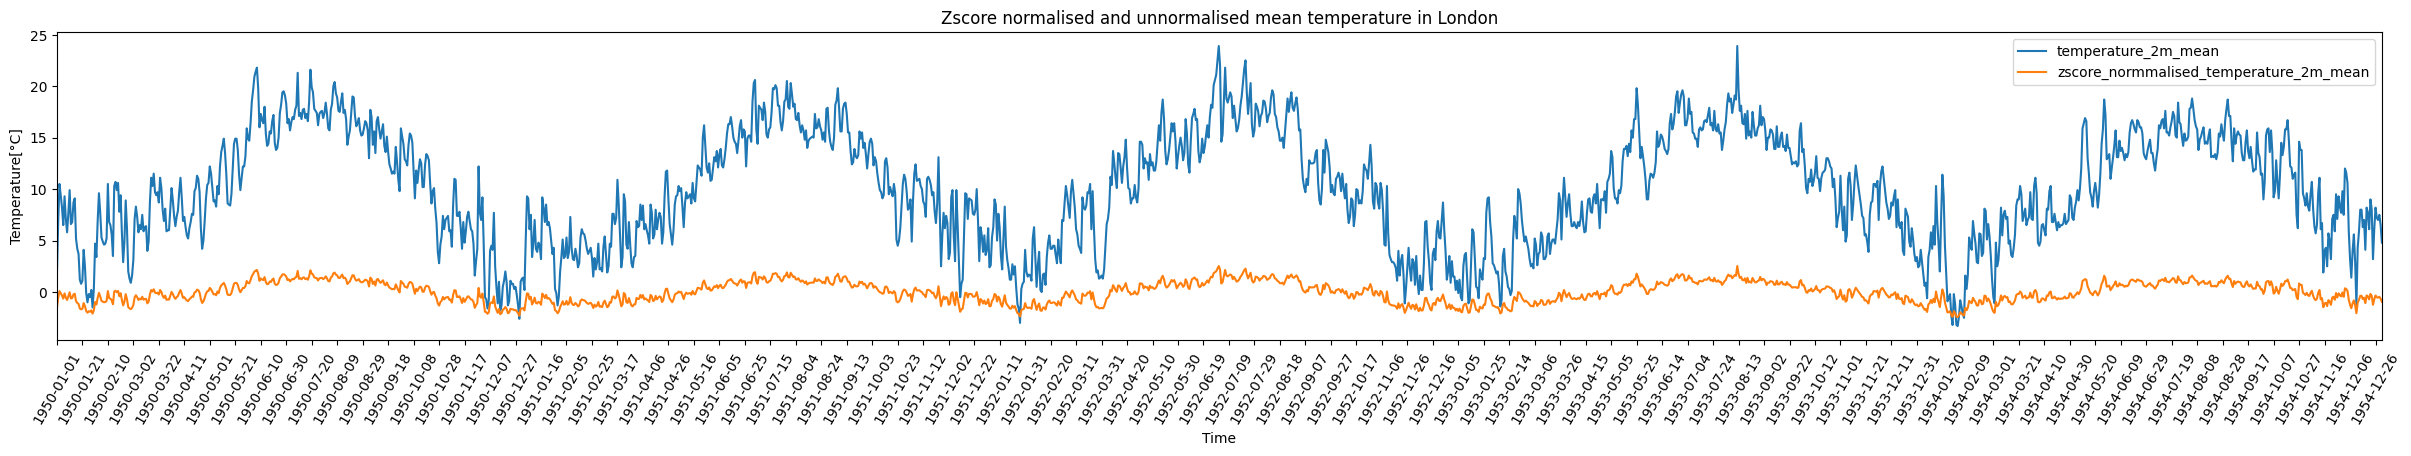

In [66]:
def zscore_norm(x: ArrayLike) -> ArrayLike:
    """
    Normalises the data using the z-score normalization.

    Args:
        x (ArrayLike): data to be normalized
    Returns:
        (ArrayLike): normalized data
    """
    # add your code here
    mean = sum(x) / len(x)    
    differences = [(value - mean)**2 for value in x]
    sum_of_differences = sum(differences)
    standard_deviation = (sum_of_differences / (len(x) - 1)) ** 0.5
    zscores = [(value - mean) / standard_deviation for value in x]
    return zscores

temp_mean = time_series['temperature_2m_mean']
znormed_temp = zscore_norm(temp_mean)

x = time_series['time']
ys_2 = [temp_mean, znormed_temp]

legend = ['temperature_2m_mean','zscore_normmalised_temperature_2m_mean']
fig, ax = lineplots(x,ys_2,"Zscore normalised and unnormalised mean temperature in London", "Time", "Temperature[°C]",legend)
plt.show()


<div class="alert alert-block alert-danger">
<h4>👩‍💻👨‍💻 TASK 5: Outliers detection</h4>

* Create a function `zscore_outliers(x, threshold=3)` that takes the acquired data, checks if each data point is an outliers by verifying that its z-score is greater than `threshold`
* The function must return the index of the outliers
* Check for outliers in `temperature_2m_mean`
</div>

In [73]:
def zscore_outliers(x: ArrayLike, threshold: int=3) -> ArrayLike:
    """
    Detects outliers using the z-score method and returns the indices of the outliers.

    Args:
        x (ArrayLike): data to be checked for outliers
        threshold (int): threshold for the z-score method

    Returns:
        (ArrayLike): indices of the outliers
    """
    # add your code here
    mean = sum(x) / len(x)
    differences = [(value - mean)**2 for value in x]
    sum_of_differences = sum(differences)
    standard_deviation = (sum_of_differences / (len(x) - 1)) ** 0.5
    
    outlier = []
    for value in x:
        z_score = (value - mean)/standard_deviation
        if abs(z_score) > threshold:
            outlier.append(x)
    return outlier

temp_mean = time_series['temperature_2m_mean']
outlier = zscore_outliers(temp_mean, 3)
print (outlier)
    

[]


<div class="alert alert-block alert-warning">
<h4>👩‍💻👨‍💻 [Optional] TASK 5.1: Plotting outliers</h4>

* Create a function `mark_outliers(ax, idx)` that marks the outliers with a red dot
* The function should return the `Figure` and the `Axis` object containing the plot
* Plot the data with the marked outliers
</div>

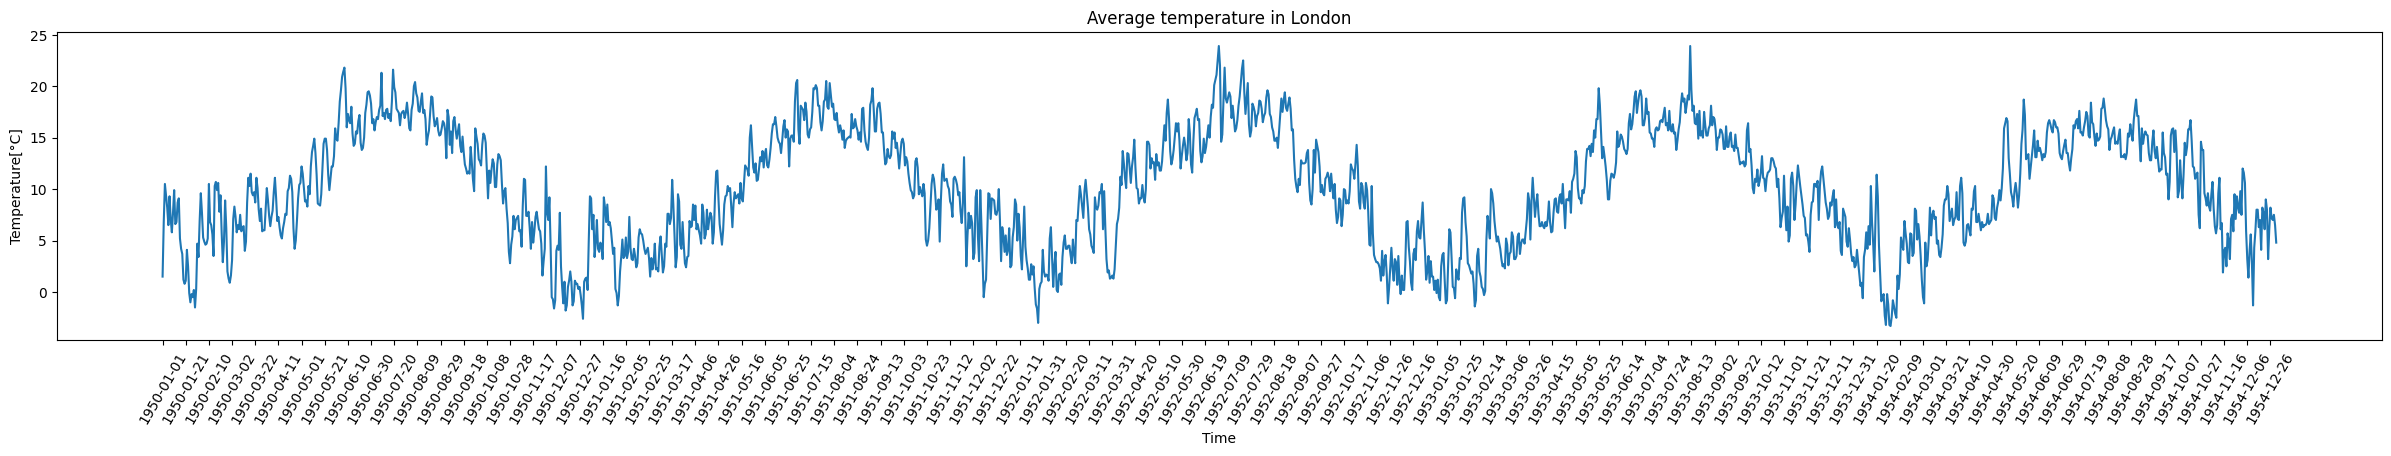

In [82]:
def mark_outliers(ax: plt.Axes, x: ArrayLike, y: ArrayLike, outliers_idx: ArrayLike) -> plt.Axes:
    """
    Plots red circles around the outliers in a certain line plot.

    Args:
        ax (plt.Axis): the older axis to plot on that contains the original line plot
        x (ArrayLike): the x-data for the line plot
        y (ArrayLike): the y-data for the line plot
        'outliers'_idx (ArrayLike): indices of the outliers
    """
    # add your code here
    
    ax.plot(x[outliers_idx],y[outliers_idx],'ro',markerfacecolor = 'none')
    return ax

x = time_series['time']
y = time_series['temperature_2m_mean']
fig,ax = lineplot(x,y,"Average temperature in London with marked outliers", "Time", "Temperature[°C]")
mark_outliers(ax,x,y,(zscore_outliers(y, 3)))
plt.show()


<div class="alert alert-block alert-warning">
<h4>👩‍💻👨‍💻 [Optional] TASK 5.3: Detect outliers using the IQR method </h4>

* Create a function `iqr_detect(x, threshold=1.5)` that returns the indices of the outliers in the original data according to the **IQR** method
* Plot the data with the marked outliers
</div>

<div class="alert alert-heading alert-danger" style="background-color: white; border: 2px solid; border-radius: 5px; color: #000; border-color:#AAA; padding: 10px">
    <b>💎 Tip</b>

* You can use `np.quantile` to get the quantile of a uniform, discrete distrbution

</div>


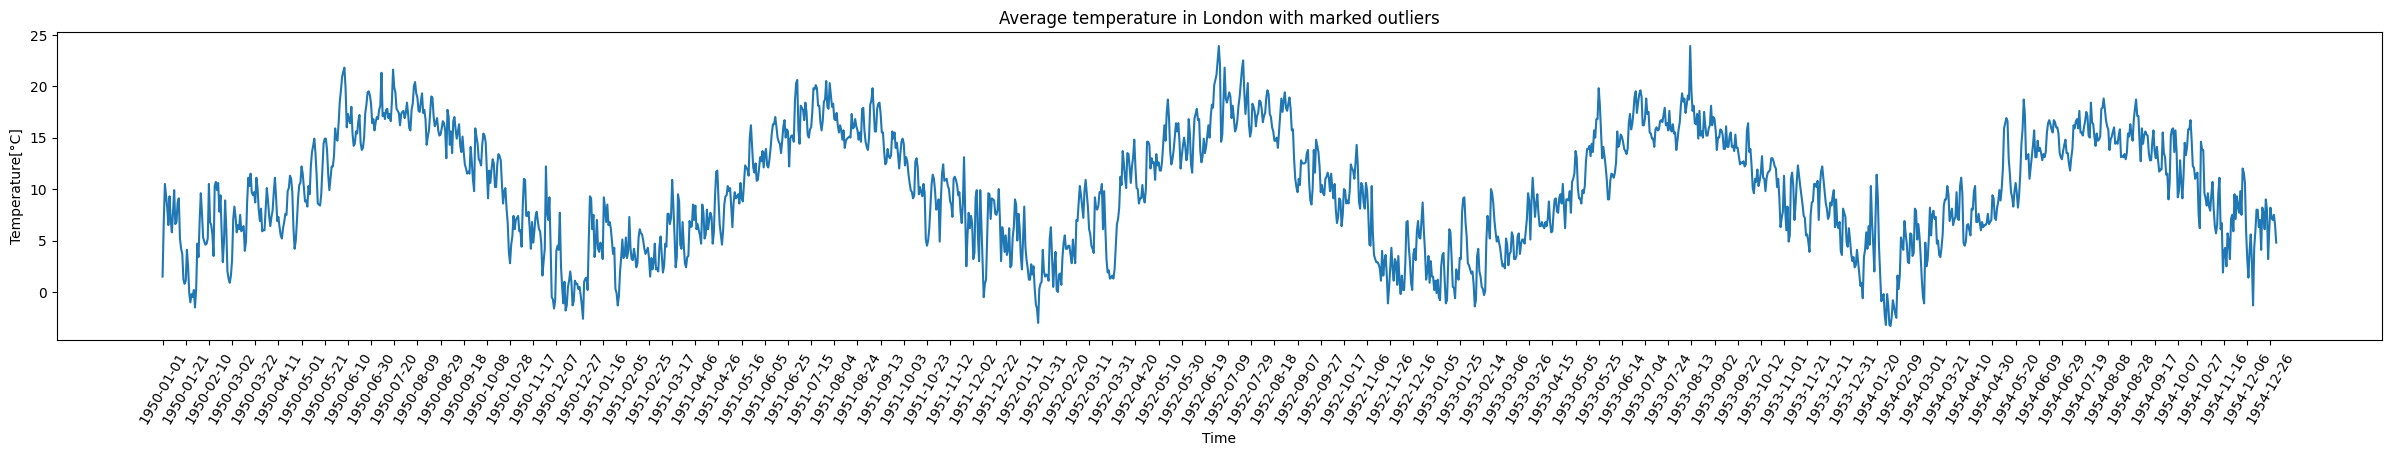

In [104]:
def iqr_detect(x: ArrayLike, threshold: float=1.5) -> ArrayLike:
    """
    Detects outliers using the interquantile range method and returns the indices of the outliers.

    Args:
        x (ArrayLike): data to be checked for outliers
        threshold (float): threshold for the interquantile range method

    Returns:
        (ArrayLike): indices of the outliers
    """
    # add your code here
    q1=x.quantile(0.25)
    q3=x.quantile(0.75)
    IQR=q3-q1
    outliers = x[((x<(q1-threshold*IQR)) | (x>(q3+threshold*IQR)))]
    return outliers

x = time_series['time']
y = time_series['temperature_2m_mean']
outliers = iqr_detect(y,1.5)

fig,ax = lineplot(x,y,"Average temperature in London with marked outliers", "Time", "Temperature[°C]")
mark_outliers(ax,x,y,outliers)
plt.show()


<div class="alert alert-block alert-danger">
<h4>👩‍💻👨‍💻 TASK 6: Clamping outliers</h4>

* One way to deal with outliers is to compress them into a range of acceptable values
* Create a function `zscore_clamp(x, threshold=3)` that clamps the outliers into the range between 10th percentile and 90th percentile
* The function should return a numpy array containing the clamped data
* Plot the non-clamped data over the clamped one
  
</div>

<div class="alert alert-heading alert-danger" style="background-color: white; border: 2px solid; border-radius: 5px; color: #000; border-color:#AAA; padding: 10px">
    <b>💎 Tip</b>

* Not every outlier is bad!! For example in financial problems, such as stock prediction, outliers is **exactly** what you are looking for
* **Removing outliers in that case might not benefit our analysis**
* Always make an **informed** decision whether to remove outliers and always **justify** it

</div>


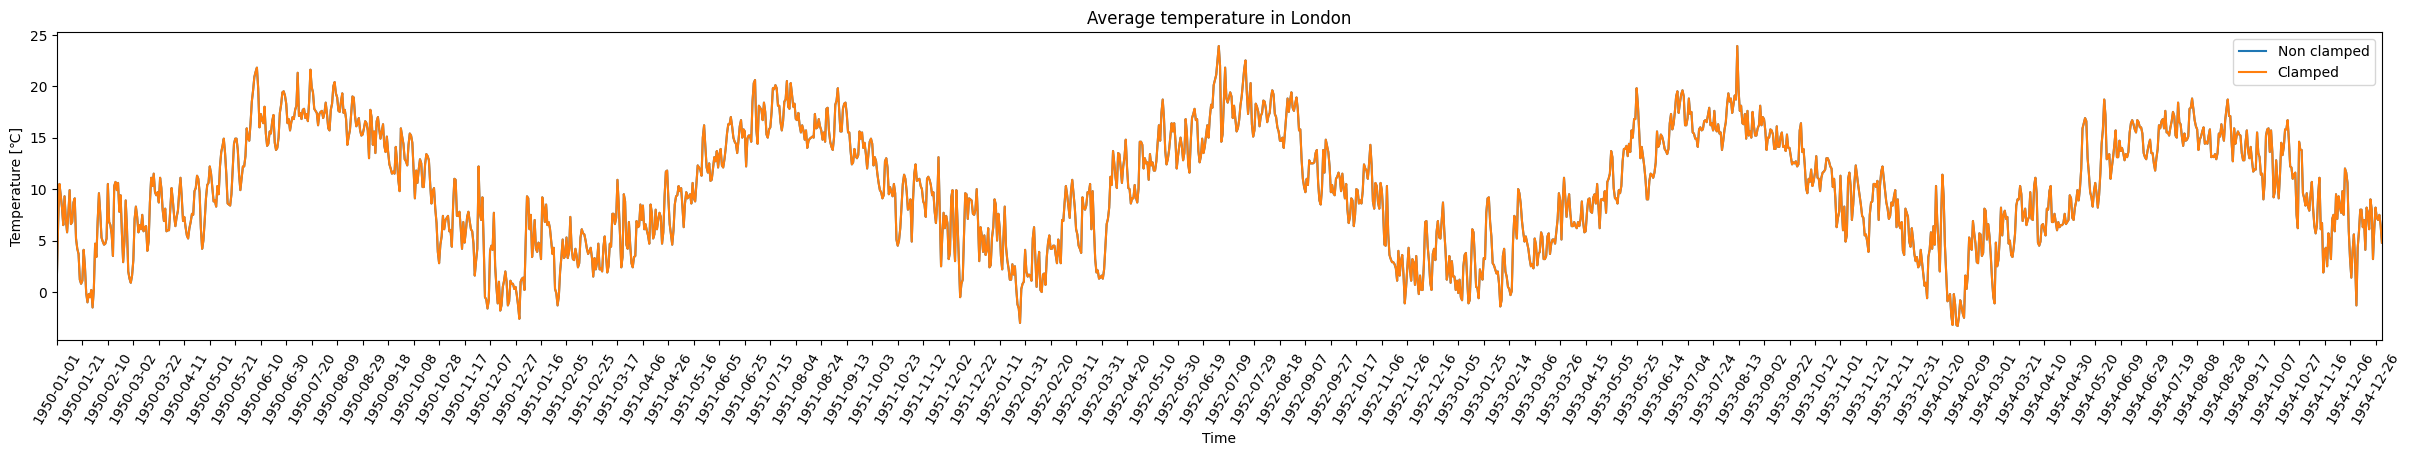

In [108]:
def zscore_clamp(x: ArrayLike, threshold: int=3) -> ArrayLike:
    """
    Clamps outliers using the z-score method and returns the clamped data.

    Args:
        x (ArrayLike): data to be clamped
        threshold (int): threshold for the z-score method

    Returns:
        (ArrayLike): clamped data
    """
    # add your code here
    z = zscore_norm(x)
    lower_bound = np.percentile(x,10)
    upper_bound = np.percentile(x,90)
    x_clamp = x.copy()
    for i in range(len(x_clamp)):
        if z[i] < -threshold:
            x_clamp[i] = lower_bound
        elif z[i] > threshold:
            x_clamp[i] = upper_bound 
    return x_clamp

x = time_series['time']
ys = [time_series["temperature_2m_mean"], zscore_clamp(time_series["temperature_2m_mean"], 3)]
legend = ["Non clamped","Clamped"]
fig, ax = lineplots(x,ys,"Average temperature in London","Time","Temperature [℃]",legend)
plt.show()

<div class="alert alert-block alert-warning">
<h4>👩‍💻👨‍💻 [Optional] TASK 6.1: Replace outliers by n-degree interpolation </h4>

* Create a function `zscore_interp(x, time, threshold=3, deg=3)` that replaces the z-score outliers with values from a polynomial fit on clean data
* The function should return a numpy array containing the interpolated data
* Plot the data before and after replacing outliers
* Experiment with different value of `deg`, e.g., `1`, `3`, `11`, and `23`
</div>

<div class="alert alert-heading alert-danger" style="background-color: white; border: 2px solid; border-radius: 5px; color: #000; border-color:#AAA; padding: 10px">
    <b>💎 Tip</b>

* You can index a numpy array with another numpy array of boolean values
* This will return only the values at which the index is `True`
* Try using this method to get only the clean data (that without outliers)
</div>


In [121]:
def zscore_interp(x: ArrayLike, y: ArrayLike, threshold: int=3, deg: int=1) -> ArrayLike:
    """
    Interpolates outliers using the z-score method and returns the interpolated data using a `deg`-degree approximation.

    Args:
        x (ArrayLike): x-variate of data to be interpolated
        y (ArrayLike): y-variate of data to be interpolated
        threshold (int): threshold for the z-score method
        deg (int): degree of the polynomial approximation

    Returns:
        (ArrayLike): interpolated data
    """
    # add your code here
    z = zscore_outliers(x,threshold)
    interpolated_data = np.polyfit(x,y,deg)
    return interpolated_data

x = time_series['time']
y = time_series["temperature_2m_mean"]
interpolated_data = zscore_interp(x,y,3,3)
ys = [y,interpolated_data]
legend = ["Non interoilated","interpolated"]
fig, ax = lineplots(x,ys,"Interpolated and non-interpolated average temperature in London","Time","Temperature [℃]",legend)
plt.show()




TypeError: unsupported operand type(s) for +: 'int' and 'str'